<a href="https://colab.research.google.com/github/GarimaChopra/AML/blob/main/Project2_Epicurious_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project studies the Epicurious dataset which contains over 20,000 recipes listed by recipe rating, nutritional information(calories, protein, fat, sodium ) and assigned binary categories 
(22-minute meal, 3-ingredient recipe, etc.) that are very sparse 



In [ ]:
# Using Pandas for importing data from file 
import pandas as pd

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sbn

# Using numpy for to operate on multidimentional arrays.
import numpy as np


In [ ]:
# Read raw file from github into a dataframe
# epi_r.csv: provides rating to recipe based on various factors
df = pd.read_csv('https://raw.githubusercontent.com/GarimaChopra/AML/master/epi_r.csv')


In [ ]:
#verify if data is loaded
df.head(5)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# the size of the dataset
df.shape

(20052, 680)

In [ ]:
#summarize the data set
df.info(verbose=True,null_counts=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 680 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     20052 non-null  object 
 1   rating                    20052 non-null  float64
 2   calories                  15935 non-null  float64
 3   protein                   15890 non-null  float64
 4   fat                       15869 non-null  float64
 5   sodium                    15933 non-null  float64
 6   #cakeweek                 20052 non-null  float64
 7   #wasteless                20052 non-null  float64
 8   22-minute meals           20052 non-null  float64
 9   3-ingredient recipes      20052 non-null  float64
 10  30 days of groceries      20052 non-null  float64
 11  advance prep required     20052 non-null  float64
 12  alabama                   20052 non-null  float64
 13  alaska                    20052 non-null  float64
 14  alcoh

In [ ]:
# statistical details of dataset
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.00000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,0.005436,0.000150,0.000100,0.041642,0.029124,0.001945,0.002244,0.005785,0.005536,0.000100,0.000598,0.068422,0.033214,0.000299,0.013415,0.000399,0.007630,0.013864,0.000997,0.010323,0.000050,0.000349,0.000349,0.013615,0.010074,0.046778,0.029274,0.220078,0.008827,0.002494,...,0.09231,0.104079,0.341412,0.000449,0.000249,0.000549,0.032815,0.000549,0.006234,0.000050,0.021195,0.001147,0.001297,0.000499,0.006882,0.003591,0.005585,0.001646,0.000050,0.000050,0.244664,0.002843,0.024287,0.001496,0.000898,0.000050,0.009525,0.154548,0.000199,0.005087,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,0.073530,0.012231,0.009987,0.199774,0.168159,0.044060,0.047321,0.075840,0.074197,0.009987,0.024456,0.252475,0.179198,0.017296,0.115047,0.019971,0.087019,0.116929,0.031567,0.101080,0.007062,0.018681,0.018681,0.115888,0.099864,0.211169,0.168577,0.414309,0.093539,0.049874,...,0.28947,0.305371,0.474195,0.021181,0.015789,0.023416,0.178156,0.023416,0.078710,0.007062,0.144037,0.033849,0.035986,0.022327,0.082675,0.059816,0.074529,0.040535,0.007062,0.007062,0.429898,0.053242,0.153942,0.038652,0.029948,0.007062,0.097134,0.361482,0.014123,0.071142,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

From above analysis we find that data contains  null values in few columns and has one object field. There are 5 continous columns (ratings,calories,protein,fat,sodium) and rest and are binary
Also we infer that data has collection issues as continuous data has huge min/max range variation

**Problem Statement:**
Perform data preparation: handle missing values and duplicate recipes, deal with skewed distributions on continuous attributes, i.e., calories, protein, fat, sodium, etc.

In [ ]:
#Handling missing values 
#Dropping rows containing missing values
df.dropna(axis=0, inplace=True)


In [ ]:
#removing duplicate rows
df.drop_duplicates('title', keep='first', inplace=True)
df.shape

(14058, 680)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f0e2efad0>,
      dtype=object)

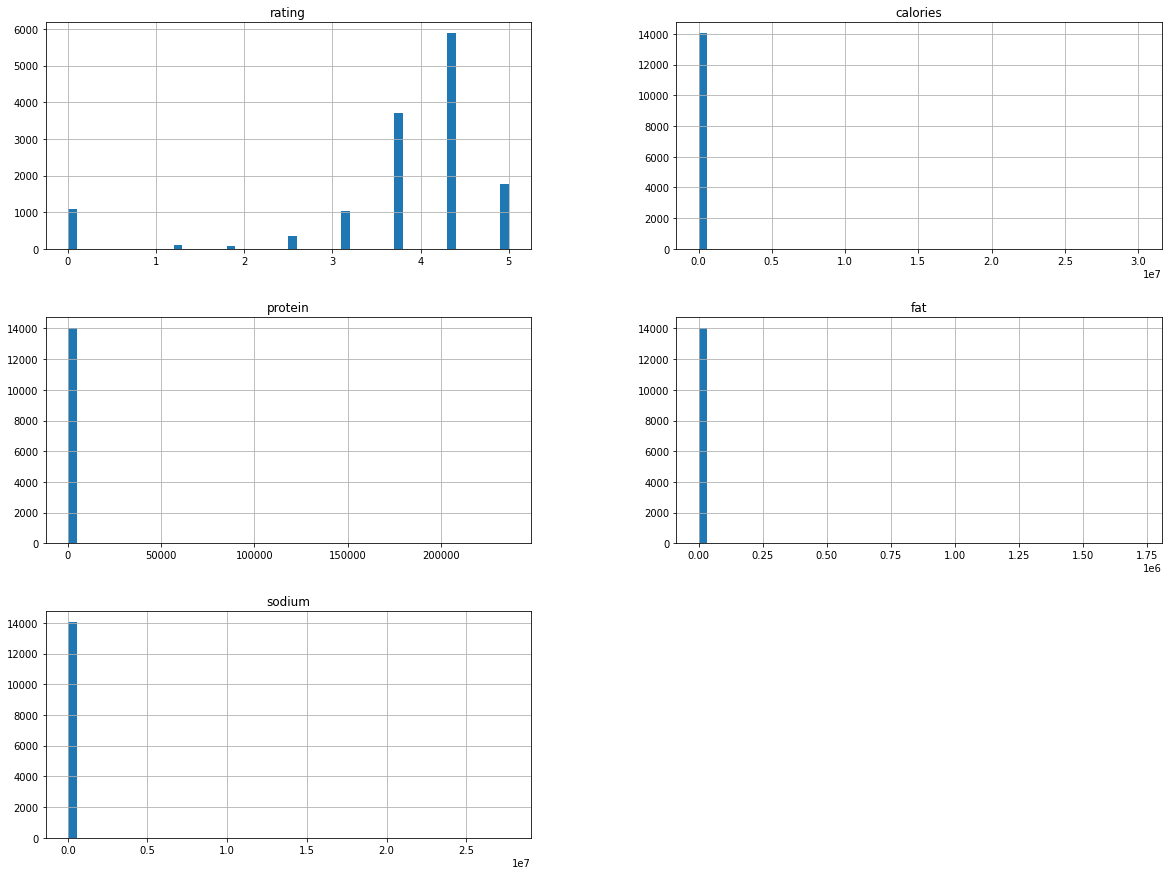

In [ ]:
#plotting graphs to understand distribution of continous data
df_continous=df[['rating','calories','protein','fat','sodium']]
df_continous.hist(bins=50, figsize=(20,15))

In [ ]:
# doing lograthmic scaling as continous functions are right skewed
from sklearn.preprocessing import FunctionTransformer
scaler = FunctionTransformer(np.log1p, validate=True)
scaler.fit(df_continous)
scaled_data = scaler.transform(df_continous)
scaled_data

array([[1.25276297, 6.05678401, 3.4339872 , 2.07944154, 6.32793678],
       [1.68175857, 6.00141488, 2.94443898, 3.17805383, 7.27239839],
       [1.55814462, 5.11198779, 1.94591015, 2.07944154, 5.11198779],
       ...,
       [1.68175857, 6.33505425, 3.4657359 , 3.66356165, 6.48157713],
       [1.68175857, 6.44888939, 3.8286414 , 3.21887582, 6.24997524],
       [1.68175857, 6.32972091, 4.30406509, 2.39789527, 8.21581779]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f0e19bbd0>,
      dtype=object)

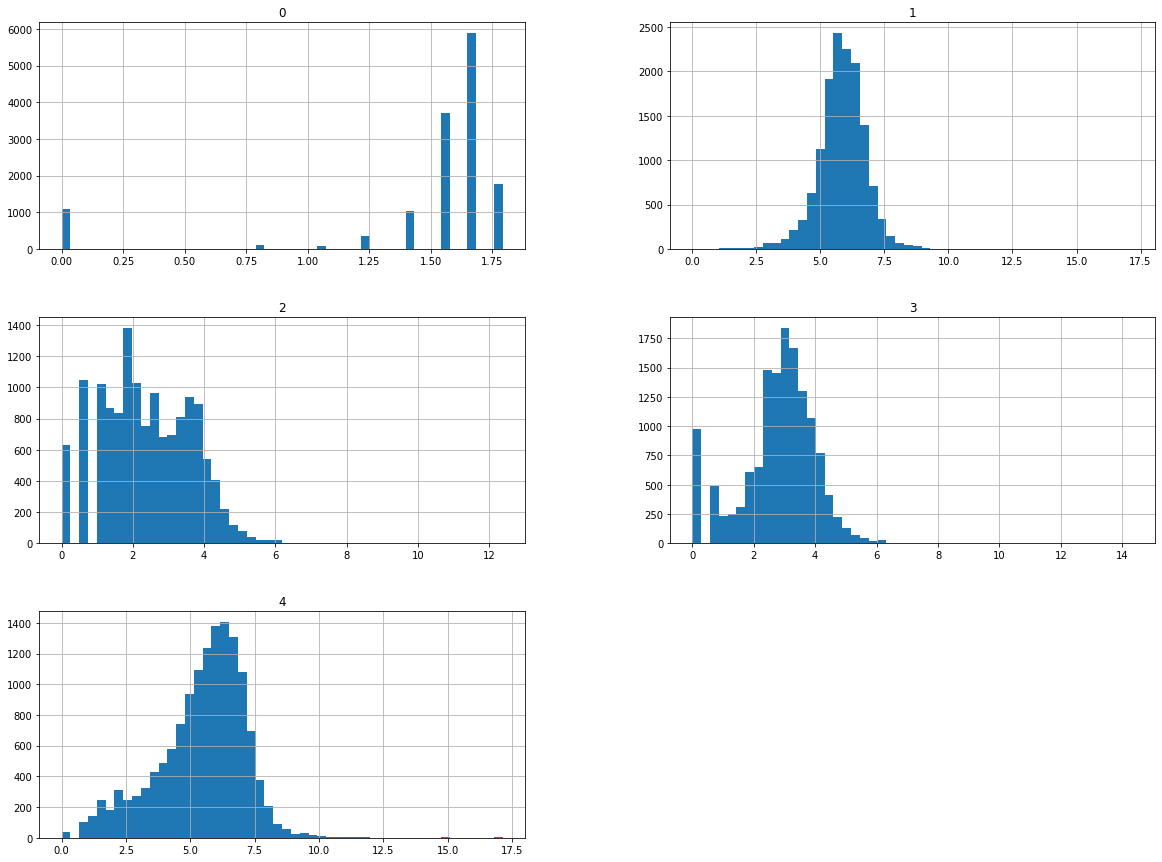

In [ ]:
#plotting graphs to understand distribution of continous data after scaling
pd.DataFrame(scaled_data).hist(bins=50, figsize=(20,15))

**Problem Statement :** Compute the pair-wise Pearson correlation coefficients r to see which numeric attributes have strong associations with rating.

In [ ]:
#Correlation 

corr_matrix=df_continous.corr()
corr_matrix["rating"].sort_values(ascending=False)

rating      1.000000
protein     0.012398
sodium      0.008052
calories    0.007622
fat         0.006992
Name: rating, dtype: float64

In [ ]:
df_continous.corr()

,rating,calories,protein,fat,sodium
rating,1.000000,0.007622,0.012398,0.006992,0.008052
calories,0.007622,1.000000,0.803335,0.996527,0.996518
protein,0.012398,0.803335,1.000000,0.770938,0.819282
fat,0.006992,0.996527,0.770938,1.000000,0.986456
sodium,0.008052,0.996518,0.819282,0.986456,1.000000


This shows that Rating is more related to protein than fat . This also shows lack of strong correlation of rating  to any of the continuous values ( as all are away from 1)

**Problem Statement:**Perform PCA on the scrubbed data to find out which attributes contribute the most to the variance. Graph the elbow plot.

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA

# option 1: only select 2 components
pca1 = PCA(n_components=2)
pca1.fit(scaled_data)


# option 2: select all components that explain 95% of variance
pca2 = PCA()
pca2.fit(scaled_data)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

# transform the data to its first 2 principal components
x_pca1 = pca1.transform(scaled_data)

# transform the data to its top 95% variance principal components
x_pca2 = pca2.transform(scaled_data)

In [ ]:
print ('Scaled data shape: ', scaled_data.shape)
print ('Transformed data shape: ', x_pca1.shape)
print ('Explained variance by 2 components: ', pca1.explained_variance_ratio_)
print ('Components explaining 95% of variance: ', d)


Scaled data shape:  (14058, 5)
Transformed data shape:  (14058, 2)
Explained variance by 2 components:  [0.74809546 0.14522258]
Components explaining 95% of variance:  4


From this we infer that when we take 2 components 74% variance lies in PC1 ,14% in PC2 and rest 12% in PC3. The Analysis show that we require 4D model to preserve 95% variance

In [ ]:
# components relations with features
print(pd.DataFrame(pca1.components_,columns=df_continous.columns,index = ['PCA-1','PCA-2']))

         rating  calories   protein       fat    sodium
PCA-1  0.044286  0.322504  0.489907  0.453121  0.669853
PCA-2 -0.016767 -0.436255 -0.220255 -0.503123  0.712569


Considering the above relationship (using abosolute values) we find both components are more aligned to sodium .

Text(0, 0.5, 'Second Principal Component')

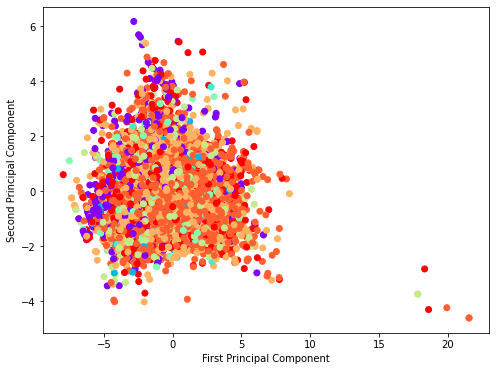

In [ ]:
# Plot the two components
plt.figure(figsize=(8,6))
plt.scatter(x_pca1[:,0],x_pca1[:,1],c=df_continous['rating'],cmap='rainbow')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

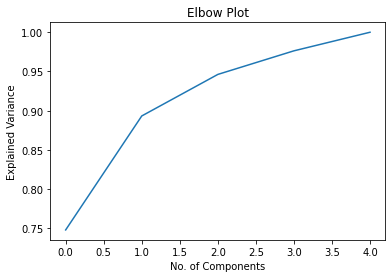

In [ ]:
# The elbow plot of the explained variance

plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Plot')
plt.show()

**Problem Statement :**Create a LogisticRegression model to determine how well the model predicts whether a recipe was part of #cakeweek or any other category that you think it should be included in the study (e.g. 22-minute meal, 3-ingredient recipe, etc.)

Creating a model which based on ingredients determines if the receipe requires advance prep 

In [ ]:
# Creating dataframe with only numeric values
df_num=df.drop(columns=["title"],axis=1)

# removing data where calorie >0 and less than 10000
df_num=df_num[df_num['calories'] > 0]
df_num=df_num[df_num['calories'] < 10000]

# removing data where ratings =0
df_num=df_num[df_num['rating'] > 0]

# removing columns not appearing often (true less than 10 times)
c=0;
for col in df_num.iloc[:,6:].columns:
   if len(df_num[df_num[col]==1])<10:
     df_num=df_num.drop(columns=col)
     c=c+1

# removing binary columns which are not ingredients
df_num=df_num.drop(columns=["22-minute meals"],axis=1)
df_num=df_num.drop(columns=["3-ingredient recipes"],axis=1)
df_num=df_num.drop(columns=["#cakeweek"],axis=1)

In [ ]:
df_num.shape

(12943, 467)

In [ ]:
df_num.describe()

,rating,calories,protein,fat,sodium,advance prep required,alcoholic,almond,amaretto,anchovy,anise,anniversary,appetizer,apple,apricot,artichoke,arugula,asian pear,asparagus,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef tenderloin,beer,beet,bell pepper,berry,birthday,bitters,blackberry,...,thyme,tofu,tomatillo,tomato,tortillas,tree nut,tree nut free,triple sec,tropical fruit,trout,tuna,turnip,valentine's day,vanilla,veal,vegan,vegetable,vegetarian,vinegar,virginia,vodka,walnut,wasabi,washington,watercress,watermelon,wedding,weelicious,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,wine,winter,wok,yellow squash,yogurt,zucchini,turkey
count,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,...,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000
mean,4.089083,517.754539,23.316155,29.798501,741.673105,0.004327,0.022947,0.031137,0.002241,0.001391,0.005408,0.006258,0.073785,0.035231,0.014293,0.008576,0.013598,0.001004,0.010971,0.013753,0.010430,0.043576,0.035077,0.255505,0.008731,0.002781,0.030441,0.004172,0.001468,0.029205,0.046434,0.003322,0.004172,0.005099,0.010353,0.039713,0.021556,0.009735,0.001777,0.007726,...,0.018002,0.004172,0.003709,0.114811,0.007185,0.004404,0.367226,0.003554,0.002859,0.002859,0.006799,0.004867,0.011821,0.013057,0.007417,0.082670,0.113189,0.353009,0.032450,0.000773,0.005486,0.023642,0.001313,0.001777,0.007649,0.003400,0.005331,0.001159,0.248397,0.002086,0.028741,0.001700,0.000850,0.009117,0.170671,0.006026,0.001468,0.023333,0.016302,0.019161
std,0.649867,610.811255,44.555283,43.676717,3063.250860,0.065637,0.149740,0.173693,0.047284,0.037268,0.073345,0.078864,0.261431,0.184371,0.118702,0.092213,0.115820,0.031678,0.104171,0.116467,0.101599,0.204157,0.183981,0.436161,0.093032,0.052668,0.171804,0.064460,0.038288,0.168387,0.210432,0.057545,0.064460,0.071230,0.101226,0.195291,0.145234,0.098188,0.042119,0.087562,...,0.132964,0.064460,0.060787,0.318806,0.084465,0.066218,0.482067,0.059512,0.053392,0.053392,0.082179,0.069600,0.108084,0.113524,0.085806,0.275394,0.316835,0.477924,0.177199,0.027786,0.073864,0.151937,0.036219,0.042119,0.087126,0.058208,0.072822,0.034025,0.432100,0.045628,0.167085,0.041195,0.029141,0.095050,0.376236,0.077399,0.038288,0.150965,0.126640,0.137096
min,1.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,219.000000,4.000000,9.00

In [ ]:
#reshape an array by adding an extra dimension
x = np.c_[df_num]
y = np.c_[df_num['advance prep required']]



In [ ]:
# Split the data set and perform logistic regression
from sklearn.model_selection import train_test_split

# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)


# Perform logistic regression for the binary output 0 (no cancer) and 1 (cancer)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter=100000)
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: advance preparation needed (1) vs. no advance preparation needed (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', x.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Total cases (12943, 467)
#Training and testing cases (9060, 467) (3883, 467)
Confusion matrix:


,0,1
0,3870,0
1,4,9


**Problem Statement**: Use your own judgment on how to define a new feature healthy. Determine if healthy and rating are correlated, and if your model can predict more accurately with the new feature added to the dataset.

Considering almost half (40-65%)of a meal should be carbs for a balanced diet , defining healthy as calorie-(fat + protein)

In [ ]:

df_num["healthy"]=df_num["calories"]-(df_num['fat']+df_num['protein'])


In [ ]:
df_continous_added_attribute=df_num[['rating','calories','protein','fat','sodium','healthy']]
corr_matrix=df_continous_added_attribute.corr()
corr_matrix["rating"].sort_values(ascending=False)

rating      1.000000
calories    0.049958
healthy     0.049170
fat         0.046196
protein     0.043009
sodium      0.027583
Name: rating, dtype: float64

In [ ]:
df_continous_added_attribute.corr()

,rating,calories,protein,fat,sodium,healthy
rating,1.000000,0.049958,0.043009,0.046196,0.027583,0.049170
calories,0.049958,1.000000,0.701937,0.911604,0.231654,0.998387
protein,0.043009,0.701937,1.000000,0.540318,0.359762,0.667040
fat,0.046196,0.911604,0.540318,1.000000,0.143711,0.904687
sodium,0.027583,0.231654,0.359762,0.143711,1.000000,0.220482
healthy,0.049170,0.998387,0.667040,0.904687,0.220482,1.000000


The new column healthy is also loosely correlated to  ratings

In [ ]:
#using new feature for prediction model

#reshape an array by adding an extra dimension
x = np.c_[df_num]
y = np.c_[df_num['advance prep required']]



In [ ]:
# Split the data set and perform logistic regression
from sklearn.model_selection import train_test_split

# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)


# Perform logistic regression for the binary output 0 (no cancer) and 1 (cancer)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter=100000)
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: advance preparation needed (1) vs. no advance preparation needed (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', x.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Total cases (12943, 467)
#Training and testing cases (9060, 467) (3883, 467)
Confusion matrix:


,0,1
0,3870,0
1,4,9


The model prediction is not effected by new column healthy